In [1]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import files
import io, requests, zipfile
from sklearn.cluster import KMeans

Read Parimah's data with a little preparation (for instance I removed '$' and ',' for more convenience)

In [22]:
data = pd.read_csv(r"\Users\Asus\Desktop\Universe\06Semester\Stat Modeling\00 Project\COVID-19-economical-effects\risk_income_data_without_medical_staff.csv")
n_s = 68
data.head()

,occ,risk,income,number
0,Waiters and Waitresses,43.6,21780,2582410
1,Amusement and Recreation Attendants,56.0,22260,319890
2,"Ushers, Lobby Attendants, and Ticket Takers",51.1,22260,133970
3,Dining Room and Cafeteria Attendants and Barte...,45.5,22270,455700
4,"Counter Attendants, Cafeteria, Food Concession...",39.5,22330,473860


In [23]:
print(data.shape)

(68, 4)


In [24]:
#keep the features (risk, income and number) in X_p and scale them with it's corresponding maximum value
X = data.drop('occ', axis=1)
X_max = X.max(axis = 0)
X = X / X_max
X.head()

,risk,income,number
0,0.576720,0.114873,0.580562
1,0.740741,0.117405,0.071916
2,0.675926,0.117405,0.030118
3,0.601852,0.117458,0.102448
4,0.522487,0.117774,0.106530


In the following we intend to:
1-classify jobs to get a sense of what we are working with. We have so far 3 dimensions. We can classify jobs only base on [risk, income] or we can classify them in a 3d space where the features are [risk, income, number]
2-for each 2 pairs of features, plot them in different colors.

We use Unsupervised clustering KMeans method. MUST INDICATE THE NUMBER OF CLUSTERS.

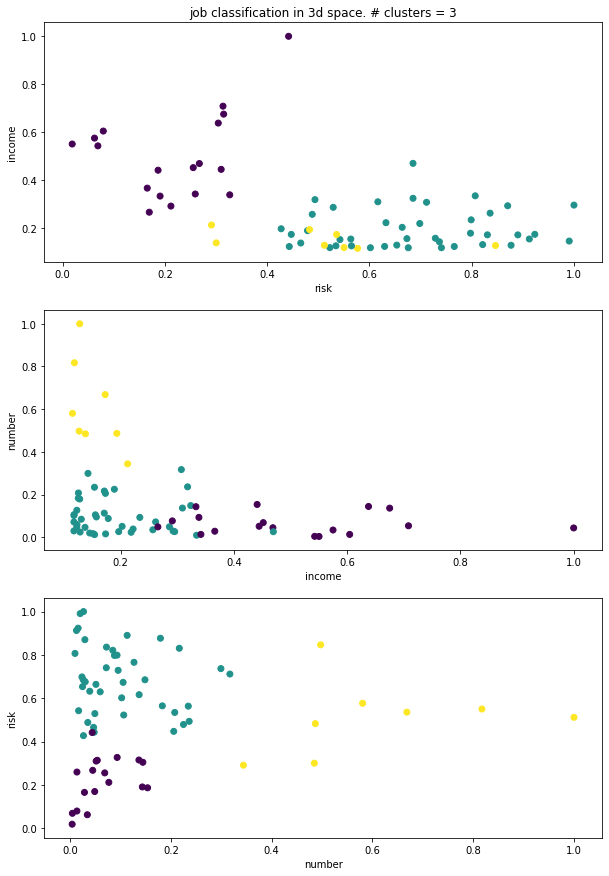

In [25]:
#Unsupervised clustering, THREE features (risk, number and income), THREE clusters.

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,15))
axs = [ax1,ax2,ax3]
N_clusters = 3
N_space = 3

y_pred = KMeans(n_clusters=3, random_state=1).fit_predict(X)

features = ['risk', 'income', 'number']
features_r = ['income', 'number', 'risk']


for i in range(3):
    feat_1 = features[i]
    feat_2 = features_r[i]
    axs[i].scatter(X[feat_1],  X[feat_2], c=y_pred)
    axs[i].set_xlabel(feat_1)
    axs[i].set_ylabel(feat_2)
    if i == 0:
        axs[i].set_title('job classification in {}d space. # clusters = {}'.format(N_space, N_clusters))


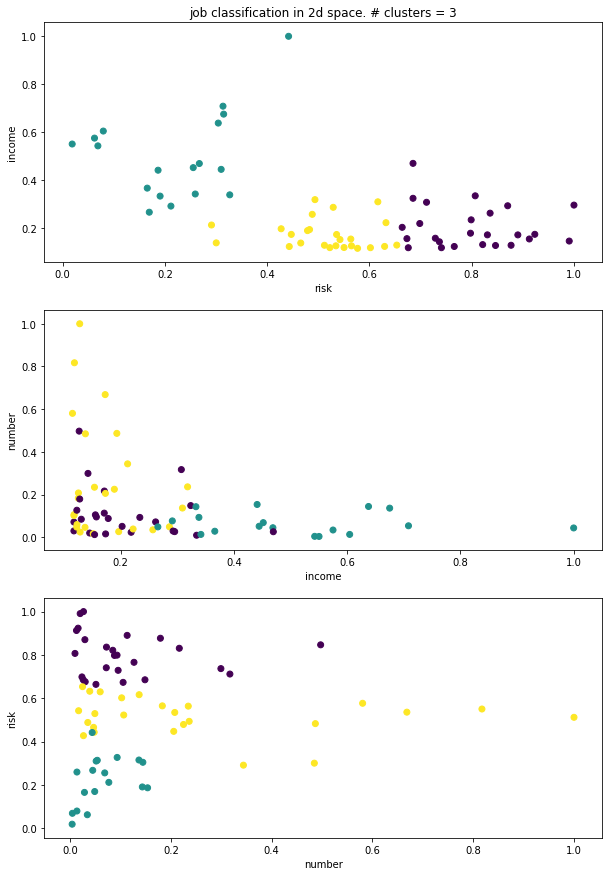

In [26]:
#Unsupervised clustering, TWO features (risk and income), THREE clusters
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,15))
axs = [ax1,ax2,ax3]
X_p = X.drop('number', axis = 1)

N_clusters = 3
N_space = 2

y_pred = KMeans(n_clusters=3, random_state=1).fit_predict(X_p)
features = ['risk', 'income', 'number']
features_r = ['income', 'number', 'risk']

for i in range(3):
    feat_1 = features[i]
    feat_2 = features_r[i]
    axs[i].scatter(X[feat_1],  X[feat_2], c=y_pred)
    axs[i].set_xlabel(feat_1)
    axs[i].set_ylabel(feat_2)
    if i == 0:
        axs[i].set_title('job classification in {}d space. # clusters = {}'.format(N_space, N_clusters))


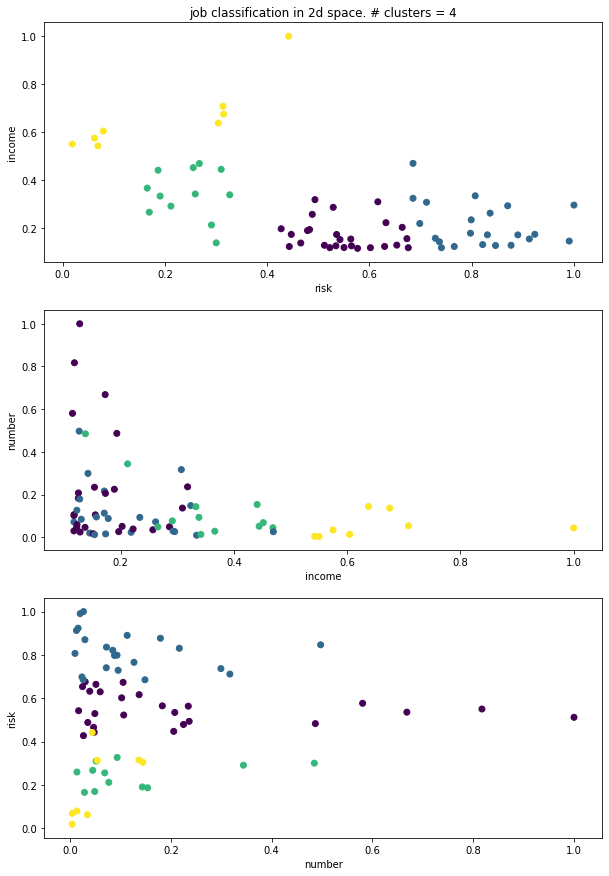

In [16]:
#Unsupervised clustering, TWO features (risk and income), FOUR clusters.
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,15))
axs = [ax1,ax2,ax3]
X_p = X.drop('number', axis = 1)

N_clusters = 4
N_space = 2


y_pred = KMeans(n_clusters=4, random_state=1).fit_predict(X_p)
features = ['risk', 'income', 'number']
features_r = ['income', 'number', 'risk']

for i in range(3):
    feat_1 = features[i]
    feat_2 = features_r[i]
    axs[i].scatter(X[feat_1],  X[feat_2], c=y_pred)
    axs[i].set_xlabel(feat_1)
    axs[i].set_ylabel(feat_2)
    if i == 0:
        axs[i].set_title('job classification in {}d space. # clusters = {}'.format(N_space, N_clusters))


Based on the last plot, one can ignore the "green" cluster (AKA medical staff). This group's characteristics: [High income, High risk, Low number]

In [27]:
X['risk_groups'] = y_pred
X['risk_groups'].head()

0    2
1    0
2    0
3    2
4    2
Name: risk_groups, dtype: int32

In [29]:
# determining the average risk and income in each group

mean_risk = [0,0,0,0]
mean_income = [0,0,0,0]
pop_per_gr = [0,0,0,0]

for i in range(len(y_pred)):
    if X['risk_groups'][i] == 0:
        mean_risk[0] += X['risk'][i] * X['number'][i]        # if you want the averages over jobs instead of population
        mean_income[0] += X['income'][i] * X['number'][i]    # , delete the last term
        pop_per_gr[0] += X['number'][i]                     #1 and set this to 1
    if X['risk_groups'][i] == 1:
        mean_risk[1] += X['risk'][i] * X['number'][i]
        mean_income[1] += X['income'][i] * X['number'][i]    
        pop_per_gr[1] += X['number'][i]
    if X['risk_groups'][i] == 2:
        mean_risk[2] += X['risk'][i] * X['number'][i]
        mean_income[2] += X['income'][i] * X['number'][i]
        pop_per_gr[2] += X['number'][i]
    if X['risk_groups'][i] == 3:
        mean_risk[3] += X['risk'][i] * X['number'][i]
        mean_income[3] += X['income'][i] * X['number'][i]
        pop_per_gr[3] += X['number'][i]
        
mean_risk = np.array(mean_risk) / np.array(pop_per_gr)
mean_income = np.array(mean_income) / np.array(pop_per_gr)

colors = ['m','skyblue','darkgreen','darkorange']
group_labels = ['high risk', 'medium risk','medical staff', 'low risk']

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [19]:
group_labels


['high risk', 'medium risk', 'medical staff', 'low risk']

In [20]:
d = pd.DataFrame()
d['group label'] = group_labels
d['risk'] = np.round(mean_risk, 2)
d['average income'] = np.round(mean_income, 2)
d['population'] = np.round(pop_per_gr,2)
d

,group label,risk,average income,population
0,high risk,0.54,0.16,5.73
1,medium risk,0.80,0.19,2.57
2,medical staff,0.26,0.27,1.55
3,low risk,0.29,0.69,0.44


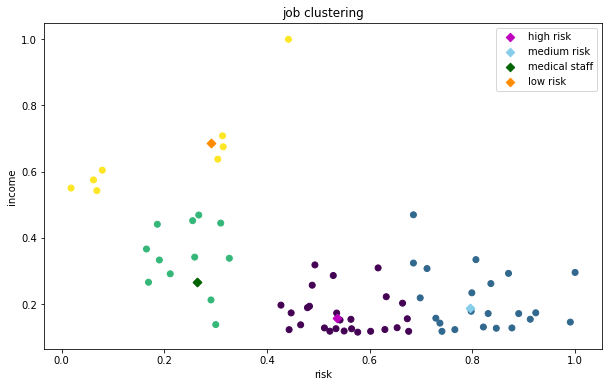

In [21]:
# plotting income vs risk for each grous and their average risks and incomes

fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlabel('risk')
ax.set_ylabel('income')
ax.set_title('job clustering')

for i in range(4):
    ax.scatter(mean_risk[i], mean_income[i], color = colors[i] ,marker = 'D', label = group_labels[i])

ax.legend()
ax.scatter(X['risk'],  X['income'], c=y_pred)
for i in range(4):
    ax.scatter(mean_risk[i], mean_income[i], color = colors[i] ,marker = 'D')